In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("Customers.csv")

# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
# Dataset shape
print("Shape:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# Summary statistics
df.describe()

Shape: (2000, 8)

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

Missing Values:
 CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Duplicates: 0


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [4]:
# Selecting numerical features for clustering
data = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert back to DataFrame for easy handling
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,Age,Annual Income ($),Spending Score (1-100)
0,-1.054089,-2.093501,-0.428339
1,-0.983723,-1.656133,1.075546
2,-1.018906,-0.540845,-1.609962
3,-0.913356,-1.131292,0.932319
4,-0.631891,-1.590528,-0.392532


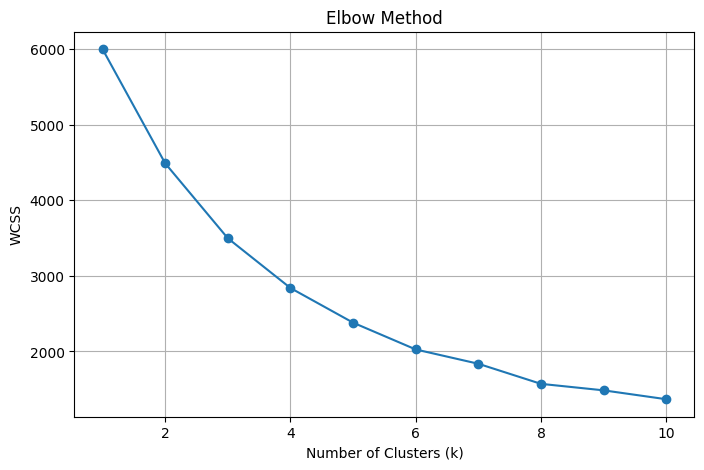

In [6]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.2454
Silhouette Score for k=3: 0.2532
Silhouette Score for k=4: 0.2641
Silhouette Score for k=5: 0.2656
Silhouette Score for k=6: 0.2801
Silhouette Score for k=7: 0.2657
Silhouette Score for k=8: 0.2757
Silhouette Score for k=9: 0.2674
Silhouette Score for k=10: 0.2759


In [8]:
# Let's say optimal k = 5 (based on elbow & silhouette)
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Show updated DataFrame
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,2
3,4,Female,23,59000,77,Lawyer,0,2,1
4,5,Female,31,38000,40,Entertainment,2,6,2


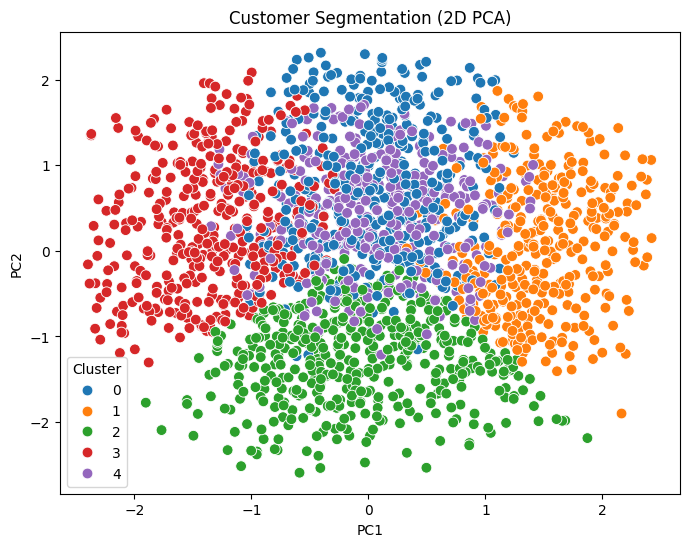

In [9]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Create DataFrame for plotting
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('Customer Segmentation (2D PCA)')
plt.show()

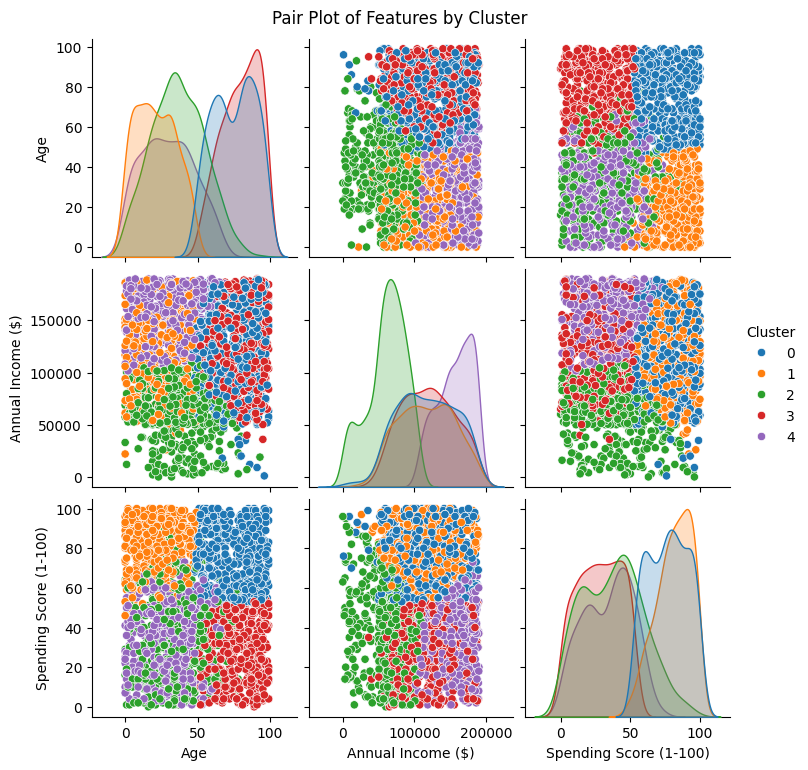

In [10]:
sns.pairplot(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='tab10')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

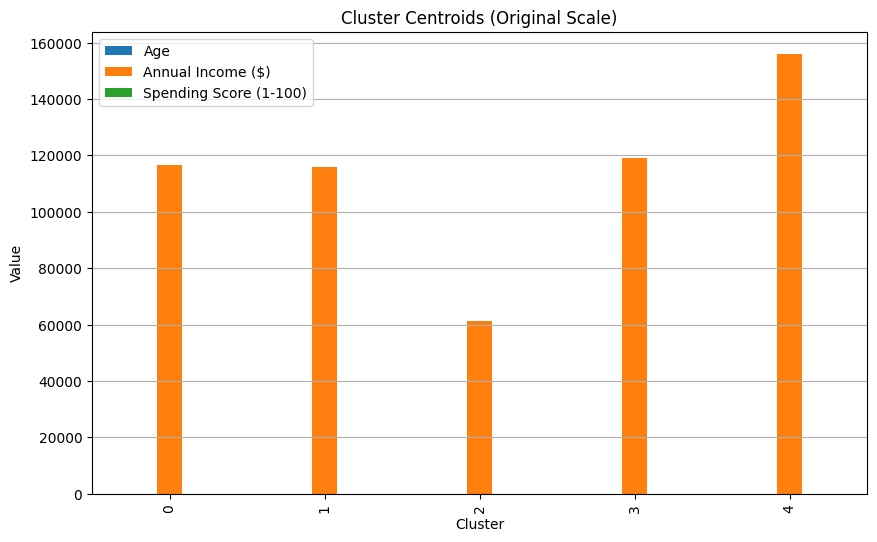

In [11]:
# Plot cluster centroids
centroids = kmeans.cluster_centers_

# Inverse scale for interpretation
centroids_original = pd.DataFrame(scaler.inverse_transform(centroids), columns=data.columns)
centroids_original.index.name = 'Cluster'

centroids_original.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centroids (Original Scale)')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()

In [12]:
# Placeholder for recommendations
recommendations = """
1. Cluster 0: Young, high-spending customers – ideal for premium offers and loyalty programs.
2. Cluster 1: Older customers with moderate income – offer value packs or discounts.
3. Cluster 2: Young but low spenders – target with awareness campaigns or promotions.
4. Cluster 3: Wealthy, low-spending customers – incentivize with exclusive offers.
5. Cluster 4: Moderate earners with high spending score – nurture with membership benefits.
"""

print(recommendations)


1. Cluster 0: Young, high-spending customers – ideal for premium offers and loyalty programs.
2. Cluster 1: Older customers with moderate income – offer value packs or discounts.
3. Cluster 2: Young but low spenders – target with awareness campaigns or promotions.
4. Cluster 3: Wealthy, low-spending customers – incentivize with exclusive offers.
5. Cluster 4: Moderate earners with high spending score – nurture with membership benefits.

